# Neural Network with Pytorch

This section is for mounting google drive in order to access the files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This section is for reading the files and setting up states the same as the example colab.

In [ ]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

filepaths = [
    '/content/drive/My Drive/Project3_LFP_data/Part1SubjectHB10.h5',
    '/content/drive/My Drive/Project3_LFP_data/Part2SubjectHB13.h5',
    '/content/drive/My Drive/Project3_LFP_data/Rat08-20130711_017.h5'
]

fs = [h5py.File(filename, 'r') for filename in filepaths]
fss = [f.attrs['fs'][0] for f in fs]

print("Sampling rates are:\n")
for i in range(len(filepaths)):
    print(str(filepaths[i]) + ": " + str(fss[i]))

sampling_rates = {
    'Part1SubjectHB10.h5': fss[0],
    'Part2SubjectHB13.h5': fss[1],
    'Rat08-20130711_017.h5': fss[2],
}


Sampling rates are:

/content/drive/My Drive/Project3_LFP_data/Part1SubjectHB10.h5: 1000.0
/content/drive/My Drive/Project3_LFP_data/Part2SubjectHB13.h5: 1000.0
/content/drive/My Drive/Project3_LFP_data/Rat08-20130711_017.h5: 1250.0


This section processes the dataset files to retrieve and display the available states and segment IDs within each file which essentially provides a snapshot of the data's structure and organization. Its the same as the example colab.

In [ ]:
filestates = []
for i in range(3):
  states = []
  print("File" + str(filepaths[i]))
  curFile = fs[i]
  for name, grp in curFile.items():
    states.append(name)
    print("State: %s" % (name))
    print("Segment IDs:")
    print(list(grp.keys()))
  filestates.append(states)
  print("\n")


File/content/drive/My Drive/Project3_LFP_data/Part1SubjectHB10.h5
State: NREM
Segment IDs:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', '7', '8', '9']
State: WAKE
Segment IDs:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '4', '5', '6', '7', '8', '9']


File/content/drive/My Drive/Project3_LFP_data/Part2SubjectHB13.h5
State: NREM
Segment IDs:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']
State: WAKE
Segment IDs:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9']


File/content/drive/My Drive/Project3_LFP_data/Rat08-20130711_017.h5
State: NREM
Segment IDs:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '2

This section is for extracting the actual data from the datasets. It reads the segments of LFPs associated with each state and converts them into a numpy arrays and appends them to a list which creates a collection of lfps where each corresponds to a different state and contains the raw signal data. Its the same as the example colab.

In [ ]:
lfps = []
for j in range(3):
  lfp = {key: [] for key in states}
  for key in filestates[j]:
    group = fs[j][key]
    n = len(group)
    for i in range(n):
      lfp[key].append(group[str(i+1)][()].astype(float))
  lfps.append(lfp)
  print(lfp)

{'NREM': [array([-1129., -1152., -1170., ...,  2631.,  2593.,  2663.]), array([-492., -522., -298., ...,  -34.,  -81.,  -45.]), array([ -496.,  -431.,  -425., ..., -3005., -3175., -3350.]), array([ 395.,  353.,  349., ..., 1111.,  938.,  834.]), array([ 2233.,  2374.,  2504., ..., -1358., -1347., -1429.]), array([-930., -824., -797., ...,  508.,  419.,  231.]), array([1235., 1510., 1606., ...,  652.,  556.,  364.]), array([   79.,   256.,   267., ..., -2565., -2319., -2090.]), array([  -3., -122., -144., ..., -206., -327., -598.]), array([-1746., -1769., -1793., ...,   798.,   970.,  1058.]), array([ 726.,  692.,  542., ..., 2513., 2549., 2471.]), array([ -114.,  -138.,   -91., ..., -2226., -2608., -2942.]), array([ -216.,  -100.,   -58., ..., -2707., -3131., -3538.]), array([ 879.,  850.,  759., ..., 1246., 1362., 1409.]), array([ 148.,  167.,  159., ..., 1166., 1108., 1008.]), array([ -205.,  -243.,  -279., ..., -1241., -1018.,  -838.]), array([ 2907.,  2830.,  2655., ..., -1777., -1

This section calculates the number of segments under the NREM and WAKE states.

In [ ]:
for file_data in lfps:
    nrem_segments = len(file_data['NREM'])
    wake_segments = len(file_data['WAKE'])

    print(f'Number of NREM segments: {nrem_segments}')
    print(f'Number of WAKE segments: {wake_segments}')


Number of NREM segments: 17
Number of WAKE segments: 38
Number of NREM segments: 19
Number of WAKE segments: 22
Number of NREM segments: 59
Number of WAKE segments: 37


This section visualizes the LFP data from whatever segment of both 'NREM' and 'WAKE' states for each file in the dataset depending on which segment you select in the code. As of right now I have the first segment selected.

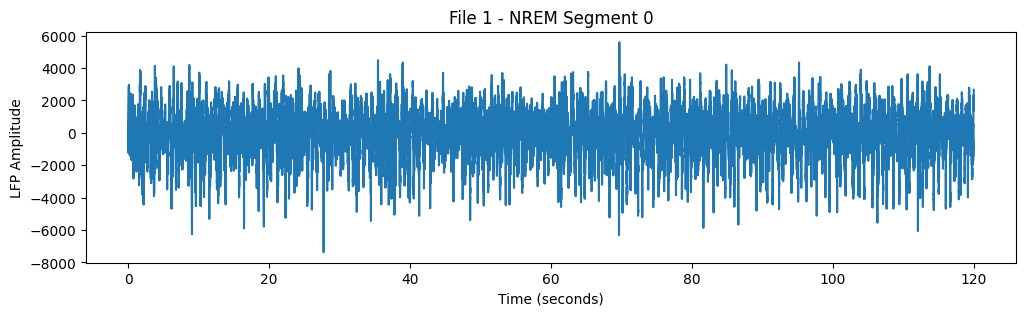

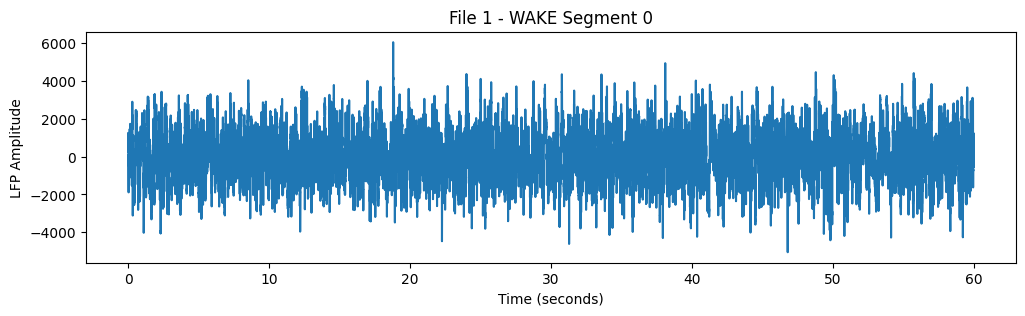

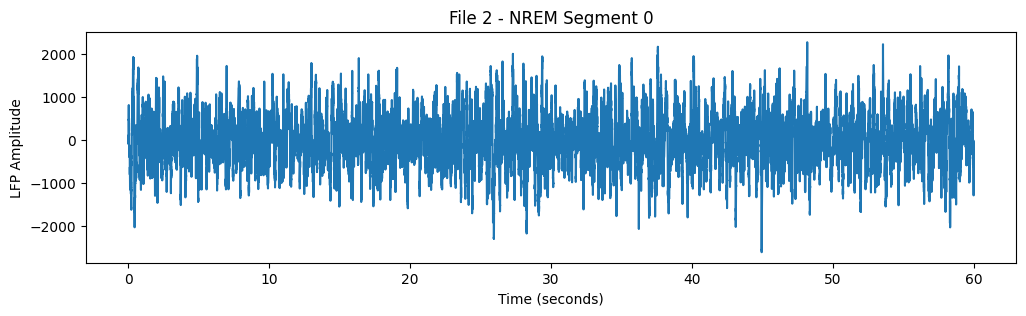

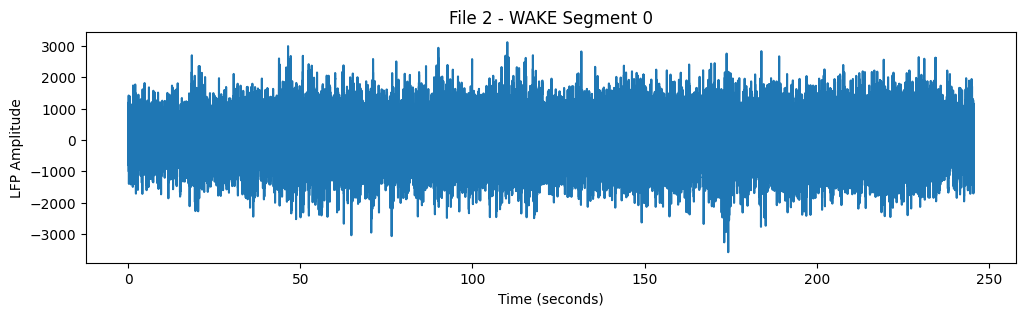

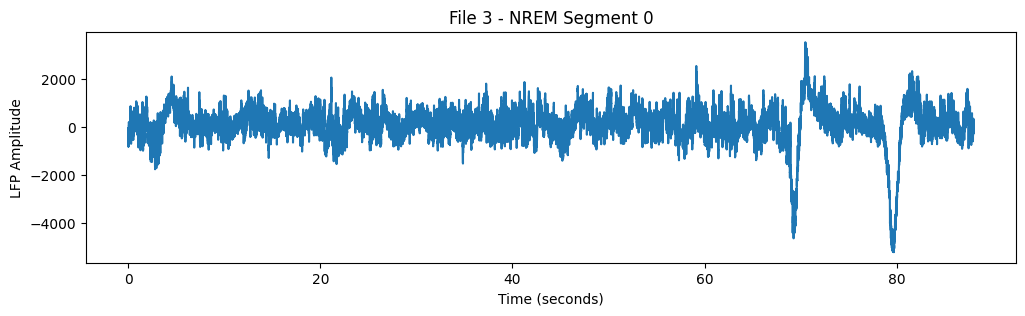

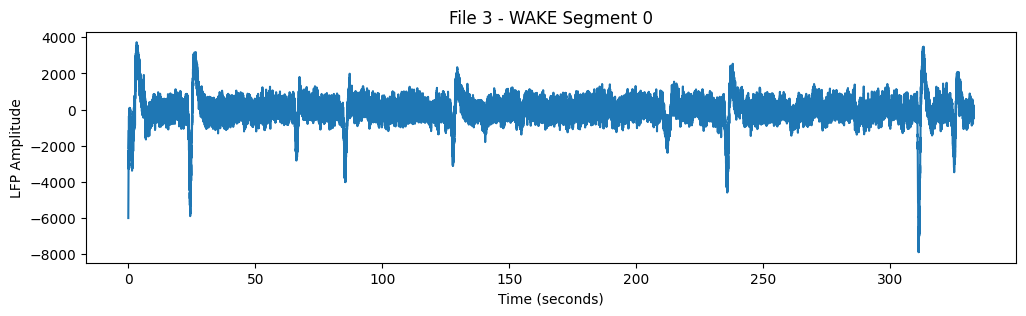

In [ ]:

for file_index, (file_data, fs) in enumerate(zip(lfps, fss)):
    #NREM segment
    nrem_segment = file_data['NREM'][0]
    t = np.arange(len(nrem_segment)) / fs
    plt.figure(figsize=(12, 3))
    plt.plot(t, nrem_segment)
    plt.title(f'File {file_index + 1} - NREM Segment 0')
    plt.xlabel('Time (seconds)')
    plt.ylabel('LFP Amplitude')
    plt.show()

    # WAKE segment
    wake_segment = file_data['WAKE'][0]
    t = np.arange(len(wake_segment)) / fs
    plt.figure(figsize=(12, 3))
    plt.plot(t, wake_segment)
    plt.title(f'File {file_index + 1} - WAKE Segment 0')
    plt.xlabel('Time (seconds)')
    plt.ylabel('LFP Amplitude')
    plt.show()


This section segments the LFP data from each subject into 5-second clips and labels them based on their state of either NREM or WAKE. They are stored in a dictionary for the next steps.

In [ ]:
clip_length_sec = 5
subject_clips_labels = {}

for j, filepath in enumerate(filepaths):
    file_data = lfps[j]
    sampling_rate = fss[j]
    num_samples_per_clip = int(sampling_rate * clip_length_sec)

    subject_clips = []
    subject_labels = []

    for state, segments in file_data.items():
        label = 0 if state == 'NREM' else 1
        for segment in segments:
            num_clips = len(segment) // num_samples_per_clip
            for i in range(num_clips):
                start = i * num_samples_per_clip
                end = start + num_samples_per_clip
                subject_clips.append(segment[start:end])
                subject_labels.append(label)

    subject_clips = np.array(subject_clips)
    subject_labels = np.array(subject_labels)

    subject_identifier = filepath.split('/')[-1]
    subject_clips_labels[subject_identifier] = (subject_clips, subject_labels)


This section of code extracts features from the segmented LFP clips for each subject. It calculates statistical measures such as mean, standard deviation, skewness, and kurtosis, and also measures the power spectral density across different frequency bands. These features are gathered into an array for each clip and collected together for each subject.

In [ ]:
from scipy.stats import skew, kurtosis
from scipy.signal import welch

subject_features = {}

for subject_identifier, (clips, labels) in subject_clips_labels.items():
    subject_specific_features = []

    for clip in clips:
        mean_val = np.mean(clip)
        std_val = np.std(clip)
        skew_val = skew(clip)
        kurt_val = kurtosis(clip)

        sampling_rate = sampling_rates[subject_identifier]

        num_samples_per_clip = len(clip)
        freqs, psd = welch(clip, fs=sampling_rate, nperseg=num_samples_per_clip//4)

        band_power_low = psd[(freqs >= 0.5) & (freqs <= 4)].mean()
        band_power_delta = psd[(freqs >= 1) & (freqs <= 4)].mean()
        band_power_theta = psd[(freqs >= 4) & (freqs <= 8)].mean()
        band_power_alpha = psd[(freqs >= 8) & (freqs <= 12)].mean()
        band_power_beta = psd[(freqs >= 12) & (freqs <= 30)].mean()
        band_power_gamma = psd[(freqs >= 30) & (freqs <= 100)].mean()

        clip_features = np.array([mean_val, std_val, skew_val, kurt_val,
                                  band_power_low, band_power_delta, band_power_theta,
                                  band_power_alpha, band_power_beta, band_power_gamma])

        subject_specific_features.append(clip_features)

    subject_features[subject_identifier] = np.vstack(subject_specific_features)


This section performs z-score normalization on the extracted features for each subject. The normalized features are stored in a dictionary which is keyed by subject identifier.

In [ ]:
from scipy.stats import zscore

normalized_subject_features = {}

for subject_identifier, features in subject_features.items():
    normalized_features = zscore(features, axis=0)
    normalized_subject_features[subject_identifier] = normalized_features


This code allocates 80% of the data to the training set and 20% to the testing set which ensures a consistent split across subjects through the use of a fixed random seed.

In [ ]:
from sklearn.model_selection import train_test_split

subject_data_splits = {}

for subject_identifier, features in normalized_subject_features.items():
    labels = subject_clips_labels[subject_identifier][1]

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    subject_data_splits[subject_identifier] = (X_train, X_test, y_train, y_test)




This section defines a simple neural network architecture named SimpleNN and trains this model on the pre-processed and split LFP data for each subject. The network comprises three linear layers with ReLU activation for the first two and a sigmoid activation for the output layer which is tailored for binary classification tasks. During training it computes both the loss using binary cross-entropy and the training accuracy at each epoch displaying these metrics periodically. After training it evaluates the model on the test set reporting the test accuracy for each subject. It stores each trained model along with its loss and accuracy history in a dictionary for potential further analysis or application.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.metrics import accuracy_score

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

trained_models = {}

for subject_identifier, splits in subject_data_splits.items():
    X_train, X_test, y_train, y_test = splits
    input_size = X_train.shape[1]
    model = SimpleNN(input_size)
    criterion = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    X_train_tensor = torch.FloatTensor(X_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    loss_history = []
    accuracy_history = []

    for epoch in range(500):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        predictions = (outputs > 0.5).float()
        correct_predictions = (predictions == y_train_tensor).float().sum()
        accuracy = correct_predictions / y_train_tensor.size(0)
        accuracy_history.append(accuracy.item())

        loss_history.append(loss.item())

        if epoch % 100 == 0:
            print(f'Subject {subject_identifier} - Epoch {epoch+1} Loss: {loss.item()} Accuracy: {accuracy.item()}')

    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predicted_classes = (predictions > 0.5).float()
        test_accuracy = accuracy_score(y_test_tensor.numpy(), predicted_classes.numpy())
        print(f'Subject {subject_identifier} - Test Accuracy: {test_accuracy}')

    trained_models[subject_identifier] = {
        'model': model,
        'loss_history': loss_history,
        'accuracy_history': accuracy_history
    }


Subject Part1SubjectHB10.h5 - Epoch 1 Loss: 0.7085069417953491 Accuracy: 0.3531034588813782
Subject Part1SubjectHB10.h5 - Epoch 101 Loss: 0.02982328273355961 Accuracy: 0.9986206889152527
Subject Part1SubjectHB10.h5 - Epoch 201 Loss: 0.005636533722281456 Accuracy: 1.0
Subject Part1SubjectHB10.h5 - Epoch 301 Loss: 0.002309621311724186 Accuracy: 1.0
Subject Part1SubjectHB10.h5 - Epoch 401 Loss: 0.0012514572590589523 Accuracy: 1.0
Subject Part1SubjectHB10.h5 - Test Accuracy: 1.0
Subject Part2SubjectHB13.h5 - Epoch 1 Loss: 0.6887759566307068 Accuracy: 0.5712328553199768
Subject Part2SubjectHB13.h5 - Epoch 101 Loss: 0.08166173845529556 Accuracy: 0.9726027250289917
Subject Part2SubjectHB13.h5 - Epoch 201 Loss: 0.018908187747001648 Accuracy: 0.9958904385566711
Subject Part2SubjectHB13.h5 - Epoch 301 Loss: 0.006229699589312077 Accuracy: 1.0
Subject Part2SubjectHB13.h5 - Epoch 401 Loss: 0.002842346206307411 Accuracy: 1.0
Subject Part2SubjectHB13.h5 - Test Accuracy: 0.9781420765027322
Subject Rat

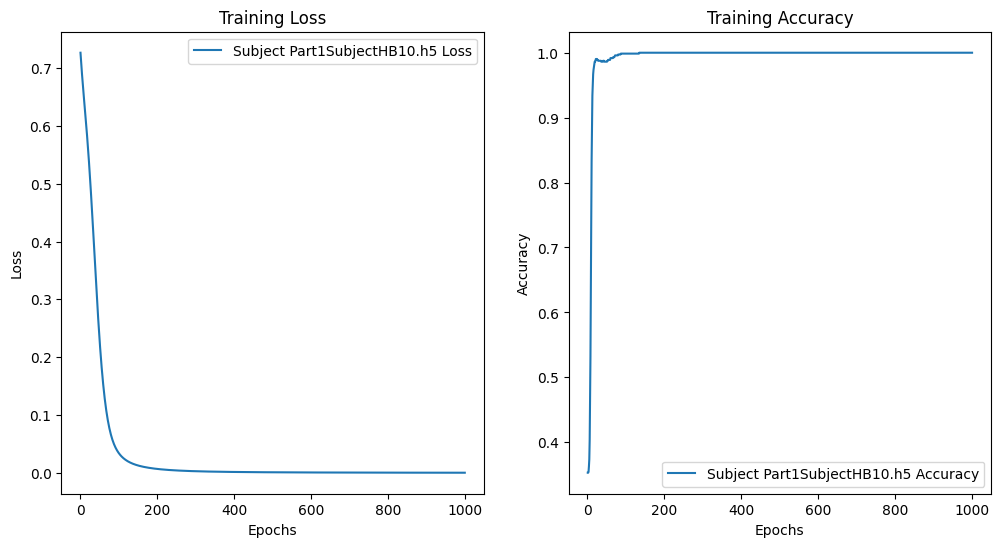

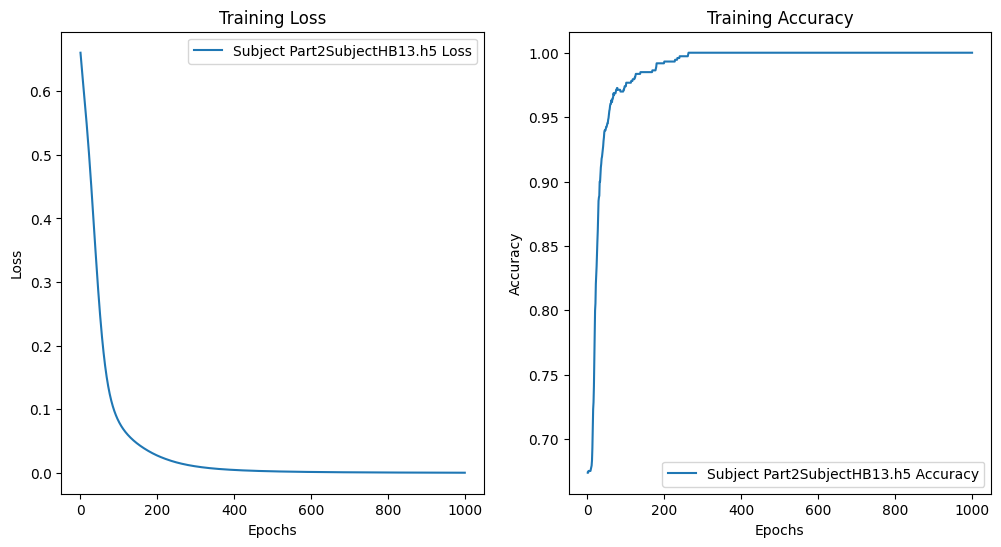

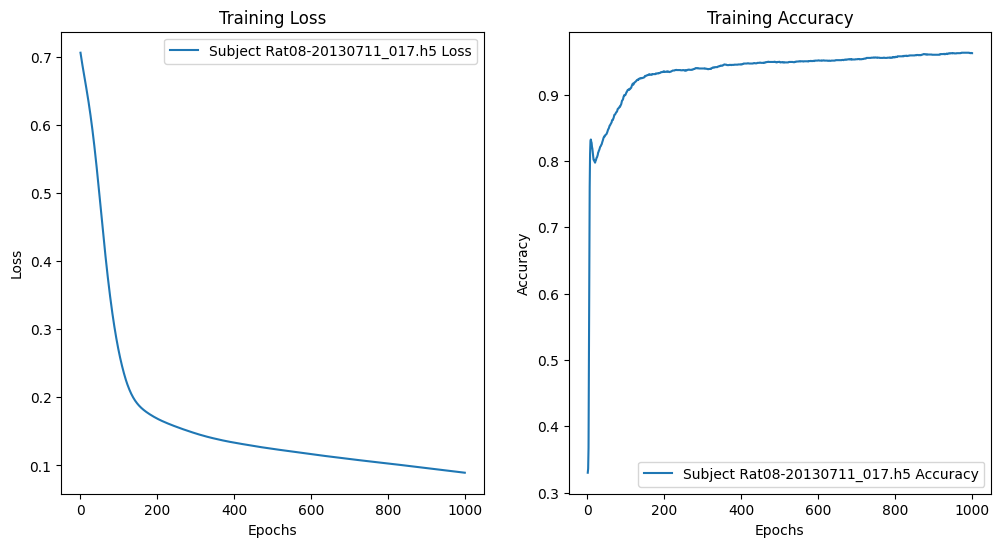

In [ ]:
for subject_identifier, model_info in trained_models.items():
    epochs = range(1, 1001)  # 1000 epochs
    loss_history = model_info['loss_history']
    accuracy_history = model_info['accuracy_history']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(epochs, loss_history, label=f'Subject {subject_identifier} Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Loss')
    ax1.legend()

    ax2.plot(epochs, accuracy_history, label=f'Subject {subject_identifier} Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training Accuracy')
    ax2.legend()

    plt.show()


In this project we compute both statistical and Power Spectral Density features for each LFP clip to capture the essential characteristics of the data. Statistical features include mean, standard deviation, skewness, and kurtosis of the signal amplitudes while PSD features analyze the frequency content which is crucial for distinguishing different brain states. We standardize these features using z-score normalization to ensure each contributes equally to the neural network which enhances stability and performance. The neural network architecture consists of three layers with ReLU activations in the first two layers and a sigmoid activation in the output layer. It is aimed at binary classification of NREM and WAKE states. Training involves backpropagation and mini-batch gradient descent and early stopping is implemented to counter overfitting. Accuracy and loss are tracked to monitor training effectiveness. Performance is visualized through accuracy and loss plots. Challenges encountered include handling imbalanced data and selecting appropriate model complexity which I addressed through class weight adjustments and hyperparameter tuning. Some potential improvements could involve exploring deeper architectures for enhanced data interpretation. The project shows the neural network successfully classifying LFP signals into distinct state which demonstrates the efficacy of the chosen methods and suggesting further research into more complex neural network structures and unsupervised learning techniques for broader applications.